<a href="https://colab.research.google.com/github/compsciewjen/Project-1010/blob/main/Happiness_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Happiness Model Project ☀️

---------


#### *Marli Cohen, Cindy Castillo, and Jennifer Cruz Mendez*


---------




## Abstract

The goal of our project is to help identify the factors that most strongly predict happiness by analyzing existing research. We are interested in exploring how both circumstances and perspectives influence individuals’ lives, particularly their ability to enjoy them. Here are some questions we hope to uncover along the way: What mindsets and attributes do happy people have? Which ones do they not have? Are people at a certain age or income bracket happier?

## Data

In [215]:
# Let's import some useful libraries that we'll use throughout our project!

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [216]:
# We have created a shared drive that contains our data (the multiple World Happiness Report files & GSS information)
# Loading these datasets from our google drive so it can be assessed in our Colab environment

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
# Creating PDF to TXT format
!pip install pypdf
from pypdf import PdfReader

def convert_pdf_to_text(pdf_path, output_txt_path):
    text = ""
    reader = PdfReader(pdf_path)

    for page in reader.pages:
        page_text = page.extract_text()
        if page_text:
            text += page_text + "\n"

    with open(output_txt_path, "w", encoding="utf-8") as f:
        f.write(text)

In [218]:
# Making all our PDFs into txt (2015-2025)
convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR25.pdf", 'WHR25')
WHR25 = open('WHR25', 'r')
WHR25_text = WHR25.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR24.pdf", 'WHR24')
WHR24 = open('WHR24', 'r')
WHR24_text = WHR24.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR23.pdf", 'WHR23')
WHR23 = open('WHR23', 'r')
WHR23_text = WHR23.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR22.pdf", 'WHR22')
WHR22 = open('WHR22', 'r')
WHR22_text = WHR22.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR21.pdf", 'WHR21')
WHR21 = open('WHR21', 'r')
WHR21_text = WHR21.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR20.pdf", 'WHR20')
WHR20 = open('WHR20', 'r')
WHR20_text = WHR20.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR19.pdf", 'WHR19')
WHR19 = open('WHR19', 'r')
WHR19_text = WHR19.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR18.pdf", 'WHR18')
WHR18 = open('WHR18', 'r')
WHR18_text = WHR18.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR17.pdf", 'WHR17')
WHR17 = open('WHR17', 'r')
WHR17_text = WHR17.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR16_Vol01.pdf", 'WHR16')
WHR16 = open('WHR16', 'r')
WHR16_text = WHR16.read()

convert_pdf_to_text("/content/drive/Shareddrives/HappinessProject/WHR15.pdf", 'WHR15')
WHR15 = open('WHR15', 'r')
WHR15_text = WHR15.read()


In [219]:
#Find the most common factors

import nltk
from nltk.corpus import stopwords #use to remove stopwords
from nltk.tokenize import word_tokenize # splits texts into individual word tokens
from collections import Counter # counts frequency of words

nltk.download('stopwords')
nltk.download('punkt')
nltk.download("punkt_tab")

stop_words = set(stopwords.words('english')) # Remove English stopwords and create a set


def find_words(text):
  token = word_tokenize(text.lower()) #converting all words into lowercase & then splitting the text into word tokens
  words = [word for word in token if word.isalpha() and word not in stop_words] #word is alpha = keeps only alphabetical words. Removes puncuation, numbers, and stopwords
  return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [220]:
#grouping all texts into 1 whole collection
all_texts = [
    WHR15_text,
    WHR16_text,
    WHR17_text,
    WHR18_text,
    WHR19_text,
    WHR20_text,
    WHR21_text,
    WHR22_text,
    WHR23_text,
    WHR24_text,
    WHR25_text
]
all_words = []


for text in all_texts:  #text holds the content of one report
  all_words.extend(find_words(text)) #adding each word into our list

print(len(all_words))
#print(all_words[0:20])
#word_freq = Counter(all_words)
#word_freq.most_common(30)

keywords = ["age", "birth", "sex", "race", "ethnicity", "hispanic", "siblings", "marital", "cohabitation"
            "children", "first child", "region", "education", "religious", "religion", "household income", "income", "household",
            "citizenship", "language", "sexual orientation", "sexual", "employment", "industry", "private", "public", "employee", "labor", "occupation",
            "prestige", "workplace", "superior", "veteran", "spouse", "partner", "birthplace", "family", "family income", "family type", "father", "mother",
            "grandparents", "region", "residence", "geography", "household size", "size", "household", "babies", "teens", "demographic", "race" , "generations",
            "visitors", "relationship", "earner", "dwelling", "fees", "voting", "vote", "election", "politics", "political", "policy", "views", "president",
            "spending", "pray", "life", "death", "bible", "christianity", "church", "social", "class", "satisfaction", "finance", "financial", "happiness",
            "work", "punishment", "capital", "discrimination", "immigration", "computer", "mobile", "device", "internet", "media", "email", "cellular", "ownership",
            "stereotype", "suicide", "gun"]

# return the frequency of words
word_freq = Counter(all_words)
keyword_counts = {word: word_freq[word] for word in keywords}
top = dict(sorted(keyword_counts.items(), key=lambda item: item[1], reverse=True))
top

436895


{'happiness': 5429,
 'life': 5094,
 'social': 3791,
 'satisfaction': 1618,
 'age': 1269,
 'income': 1219,
 'public': 648,
 'work': 572,
 'family': 452,
 'policy': 451,
 'region': 412,
 'household': 404,
 'political': 398,
 'education': 397,
 'media': 393,
 'relationship': 369,
 'capital': 320,
 'size': 274,
 'death': 206,
 'language': 188,
 'employment': 187,
 'spending': 117,
 'labor': 101,
 'financial': 100,
 'voting': 98,
 'generations': 91,
 'partner': 89,
 'birth': 85,
 'demographic': 83,
 'vote': 82,
 'workplace': 74,
 'internet': 72,
 'private': 71,
 'marital': 70,
 'suicide': 66,
 'views': 65,
 'politics': 62,
 'election': 61,
 'discrimination': 60,
 'religious': 53,
 'religion': 49,
 'geography': 49,
 'residence': 43,
 'immigration': 43,
 'mobile': 43,
 'employee': 39,
 'class': 37,
 'industry': 33,
 'president': 29,
 'finance': 28,
 'computer': 28,
 'mother': 27,
 'sex': 25,
 'ethnicity': 17,
 'occupation': 16,
 'superior': 15,
 'punishment': 15,
 'citizenship': 12,
 'father'

 The top 5 most frequent words in our collection are 'happiness', 'life', 'social', 'satisfaction', and 'age'. So far we have only examined the amount of the times these words have appeared throughout World Happiness report (2015-25), but it doesn't quite tell us more information. Let's instead use these most common variables to select the associated GSS(The General Social Survey) variables.

##Tidying up data

In [221]:
# Now that we have a list of GSS variables we will have to tidy the dataset in order for it to be properly used.
df = pd.read_json('/content/drive/Shareddrives/HappinessProject/post_processing_output.json')

new_df = pd.DataFrame()
new_df['id'] = df.loc['id_']['data']
new_df['year'] = df.loc['year']['data']
new_df['age'] = df.loc['age']['data']
new_df['income'] = df.loc['income16']['data']
new_df['eqwlth'] = df.loc['eqwlth']['data']
new_df['postlife'] = df.loc['postlife']['data']
new_df['happy'] = df.loc['happy']['data']
new_df['hapmar'] = df.loc['hapmar']['data']
new_df['hapcohab'] = df.loc['hapcohab']['data']
new_df['life'] = df.loc['life']['data']
new_df['helpful'] = df.loc['helpful']['data']
new_df['fair'] = df.loc['fair']['data']
new_df['trust'] = df.loc['trust']['data']
new_df['satjob'] = df.loc['satjob']['data']
new_df['satfin'] = df.loc['satfin']['data']
new_df['goodlife'] = df.loc['goodlife']['data']
new_df['cantrust'] = df.loc['cantrust']['data']
new_df['dwelown16'] = df.loc['dwelown16']['data']
new_df['RISKLIFE'] = df.loc['RISKLIFE']['data']
new_df['TAKELIFE'] = df.loc['TAKELIFE']['data']

In [222]:
# Much of the data has missing values/no answers.
# Convert these to NaN
new_df = new_df.replace('.i:  Inapplicable', np.nan)
new_df = new_df.replace('.n:  No answer', np.nan)
new_df = new_df.replace('.s:  Skipped on Web', np.nan)
new_df = new_df.replace('.d:  Do not Know/Cannot Choose', np.nan)
new_df = new_df.replace('.r:  Refused', np.nan)

In [223]:
# Happiness Wrangling
new_df = new_df.replace('Very happy', 3)
new_df = new_df.replace('Pretty happy', 2)
new_df = new_df.replace('Not too happy', 1)
new_df = new_df.dropna(subset=['happy'])

/tmp/ipython-input-3242028957.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df = new_df.replace('Not too happy', 1)


In [224]:
#Eqwlth Wrangling
new_df = new_df.replace('The government should reduce income differences', 1)
new_df = new_df.replace('The government should not concern itself with reducing income differences', 7)
# testEqwlth = new_df[new_df['eqwlth'] == 7]
# testEqwlth

In [225]:
# Age Wrangling
new_df['age'] = new_df['age'].replace('.n:  No answer', np.nan)
new_df['age'] = new_df['age'].replace('89 or older', 89)  # 89 includes 89+
new_df = new_df.dropna(subset=['age'])
new_df['age'] = new_df['age'].astype('int64')

In [226]:
# Income Wrangling
new_df['income'] = new_df['income'].replace('Under $1,000', 0)
new_df['income'] = new_df['income'].replace('$1,000 to $2,999', 1000)
new_df['income'] = new_df['income'].replace('$3,000 to $3,999', 3000)
new_df['income'] = new_df['income'].replace('$4,000 to $4,999', 4000)
new_df['income'] = new_df['income'].replace('$5,000 to $5,999', 5000)
new_df['income'] = new_df['income'].replace('$6,000 to $6,999', 6000)
new_df['income'] = new_df['income'].replace('$7,000 to $7,999', 7000)
new_df['income'] = new_df['income'].replace('$8,000 to $9,999', 8000)
new_df['income'] = new_df['income'].replace('$10,000 to $12,499', 10000)
new_df['income'] = new_df['income'].replace('$12,500 to $14,999', 12500)
new_df['income'] = new_df['income'].replace('$15,000 to $17,499', 15000)
new_df['income'] = new_df['income'].replace('$17,500 to $19,999', 17500)
new_df['income'] = new_df['income'].replace('$20,000 to $22,499', 20000)
new_df['income'] = new_df['income'].replace('$22,500 to $24,999', 22500)
new_df['income'] = new_df['income'].replace('$25,000 to $29,999', 25000)
new_df['income'] = new_df['income'].replace('$30,000 to $34,999', 30000)
new_df['income'] = new_df['income'].replace('$35,000 to $39,999', 35000)
new_df['income'] = new_df['income'].replace('$40,000 to $49,999', 40000)
new_df['income'] = new_df['income'].replace('$50,000 to $59,999', 50000)
new_df['income'] = new_df['income'].replace('$60,000 to $74,999', 60000)
new_df['income'] = new_df['income'].replace('$75,000 to $89,999', 75000)
new_df['income'] = new_df['income'].replace('$90,000 to $109,999', 90000)
new_df['income'] = new_df['income'].replace('$110,000 to $129,999', 110000)
new_df['income'] = new_df['income'].replace('$130,000 to $149,999', 130000)
new_df['income'] = new_df['income'].replace('$150,000 to $169,999', 150000)
new_df['income'] = new_df['income'].replace('$170,000 or over', 170000)


new_df

/tmp/ipython-input-2765847450.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['income'] = new_df['income'].replace('$170,000 or over', 170000)


,id,year,age,income,eqwlth,postlife,happy,hapmar,hapcohab,life,helpful,fair,trust,satjob,satfin,goodlife,cantrust,dwelown16,RISKLIFE,TAKELIFE
0,1,2024,33,110000.0,1,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,Moderately satisfied,Not satisfied at all,Agree,NaN,Paid rent,NaN,NaN
1,2,2024,64,60000.0,3,YES,2.0,NaN,NaN,NaN,Depends,Would try to be fair,Can't be too careful,NaN,More or less satisfied,Agree,Usual not trsted,Owned or was buying,NaN,NaN
2,3,2024,69,110000.0,1,NaN,2.0,VERY HAPPY,NaN,Routine,NaN,NaN,NaN,NaN,Pretty well satisfied,Agree,Usually trusted,NaN,Somewhat likely,NaN
3,4,2024,19,150000.0,NaN,NaN,2.0,NaN,NaN,Routine,NaN,NaN,NaN,Very satisfied,More or less satisfied,NaN,NaN,Paid rent,Not very likely,Not very likely
4,5,2024,70,60000.0,3,NaN,1.0,NaN,NaN,Routine,NaN,NaN,NaN,NaN,More or less satisfied,Strongly disagree,Usual not trsted,NaN,Somewhat likely,Not very likely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,3305,2024,84,4000.0,2,NaN,2.0,VERY HAPPY,NaN,Exciting,NaN,NaN,NaN,Very satisfied,Pretty well satisfied,Neither,Usually trusted,NaN,Somewhat likely,Not very likely
3305,3306,2024,68,75000.0,NaN,NaN,2.0,PRETTY HAPPY,NaN,Routine,NaN,NaN,NaN,Very satisfied,More or less satisfied,NaN,NaN,Owned or was buying,Not very likely,Not very likely
3306,3307,2024,74,50000.0,NaN,NaN,2.0,PRETTY HAPPY,NaN,Dull,NaN,NaN,NaN,NaN,More or less satisfied,NaN,NaN,Owned or was buying,NaN,NaN
3307,3308,2024,51,75000.0,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Very satisfied,More or less satisfied,Neither,Usual not trsted,Owned or was buying,NaN,NaN


## Handling Imputation

We noticed that if we dropped all of our NaN values, we would not have any data to make predictions(at least one NaN in each column). Our work around this is issue it to  replace all the NA values with the most frequent value in the column, allowing us to continue with the creation of our models.

In [227]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') #replace NaN with most frequent

new_df['eqwlth'] = imputer.fit_transform(new_df[['eqwlth']])[:, 0]
new_df['eqwlth']

new_df['postlife'] = imputer.fit_transform(new_df[['postlife']])[:, 0]
new_df['postlife']
#sns.barplot(x=new_df['postlife'], y=new_df['happy'])

new_df['income'] = imputer.fit_transform(new_df[['income']])[:, 0]
new_df['income']
# #sns.barplot(x=new_df['income16'], y=new_df['happy'])

new_df["happy"] = imputer.fit_transform(new_df[["happy"]])[:, 0]
new_df["happy"]
#sns.barplot(x=new_df['happy'], y=new_df['happy'])

new_df['hapmar'] = imputer.fit_transform(new_df[['hapmar']])[:, 0]
new_df['hapmar']
#sns.barplot(x=new_df['hapmar'], y=new_df['happy'])

new_df['hapcohab'] = imputer.fit_transform(new_df[['hapcohab']])[:, 0]
new_df['hapcohab']
#sns.barplot(x=new_df['hapcohab'], y=new_df['happy'])

new_df['life'] = imputer.fit_transform(new_df[['life']])[:, 0]
new_df['life']
#sns.barplot(x=new_df['life'], y=new_df['happy'])

new_df['helpful'] = imputer.fit_transform(new_df[['helpful']])[:, 0]
new_df['helpful']
#sns.barplot(x=new_df['helpful'], y=new_df['happy'])

new_df['fair'] = imputer.fit_transform(new_df[['fair']])[:, 0]
new_df['fair']
#sns.barplot(x=new_df['fair'], y=new_df['happy'])

new_df['trust'] = imputer.fit_transform(new_df[['trust']])[:, 0]
new_df['trust']
#sns.barplot(x=new_df['trust'], y=new_df['happy'])

new_df['satjob'] = imputer.fit_transform(new_df[['satjob']])[:, 0]
new_df['satjob']
#sns.barplot(x=new_df['satjob'], y=new_df['happy'])

new_df['satfin'] = imputer.fit_transform(new_df[['satfin']])[:, 0]
new_df['satfin']
#sns.barplot(x=new_df['satfin'], y=new_df['happy'])

new_df['goodlife'] = imputer.fit_transform(new_df[['goodlife']])[:, 0]
new_df['goodlife']
#sns.barplot(x=new_df['goodlife'], y=new_df['happy'])

new_df['cantrust'] = imputer.fit_transform(new_df[['cantrust']])[:, 0]
new_df['cantrust']
#sns.barplot(x=new_df['cantrust'], y=new_df['happy'])

new_df['dwelown16'] = imputer.fit_transform(new_df[['dwelown16']])[:, 0]
new_df['dwelown16']

new_df['RISKLIFE'] = imputer.fit_transform(new_df[['RISKLIFE']])[:, 0]
new_df['RISKLIFE']

new_df['TAKELIFE'] = imputer.fit_transform(new_df[['TAKELIFE']])[:, 0]
new_df['TAKELIFE']

new_df

,id,year,age,income,eqwlth,postlife,happy,hapmar,hapcohab,life,helpful,fair,trust,satjob,satfin,goodlife,cantrust,dwelown16,RISKLIFE,TAKELIFE
0,1,2024,33,110000.0,1,YES,1.0,VERY HAPPY,2.0,Routine,Looking out for themselves,Would take advantage of you,Can't be too careful,Moderately satisfied,Not satisfied at all,Agree,Usual not trsted,Paid rent,Not very likely,Not very likely
1,2,2024,64,60000.0,3,YES,2.0,VERY HAPPY,3.0,Routine,Depends,Would try to be fair,Can't be too careful,Very satisfied,More or less satisfied,Agree,Usual not trsted,Owned or was buying,Not very likely,Not very likely
2,3,2024,69,110000.0,1,YES,2.0,VERY HAPPY,3.0,Routine,Looking out for themselves,Would take advantage of you,Can't be too careful,Very satisfied,Pretty well satisfied,Agree,Usually trusted,Owned or was buying,Somewhat likely,Not very likely
3,4,2024,19,150000.0,1,YES,2.0,VERY HAPPY,3.0,Routine,Looking out for themselves,Would take advantage of you,Can't be too careful,Very satisfied,More or less satisfied,Agree,Usual not trsted,Paid rent,Not very likely,Not very likely
4,5,2024,70,60000.0,3,YES,1.0,VERY HAPPY,3.0,Routine,Looking out for themselves,Would take advantage of you,Can't be too careful,Very satisfied,More or less satisfied,Strongly disagree,Usual not trsted,Owned or was buying,Somewhat likely,Not very likely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,3305,2024,84,4000.0,2,YES,2.0,VERY HAPPY,3.0,Exciting,Looking out for themselves,Would take advantage of you,Can't be too careful,Very satisfied,Pretty well satisfied,Neither,Usually trusted,Owned or was buying,Somewhat likely,Not very likely
3305,3306,2024,68,75000.0,1,YES,2.0,PRETTY HAPPY,3.0,Routine,Looking out for themselves,Would take advantage of you,Can't be too careful,Very satisfied,More or less satisfied,Agree,Usual not trsted,Owned or was buying,Not very likely,Not very likely
3306,3307,2024,74,50000.0,1,YES,2.0,PRETTY HAPPY,3.0,Dull,Looking out for themselves,Would take advantage of you,Can't be too careful,Very satisfied,More or less satisfied,Agree,Usual not trsted,Owned or was buying,Not very likely,Not very likely
3307,3308,2024,51,75000.0,1,YES,2.0,VERY HAPPY,3.0,Routine,Looking out for themselves,Would take advantage of you,Can't be too careful,Very satisfied,More or less satisfied,Neither,Usual not trsted,Owned or was buying,Not very likely,Not very likely


Now that we have our tidy data we can take a step forward to creating our predictive models.

## Base Accuracy

If we guessed the most common value for each observation, how accurate would we be?

In [228]:
count_observations = new_df.shape[0]
count_1 = new_df[new_df['happy'] == 1].shape[0]
count_2 = new_df[new_df['happy'] == 2].shape[0]
count_3 = new_df[new_df['happy'] == 3].shape[0]

print(count_observations)
print(count_1)
print(count_2)
print(count_3)

base_acc = count_2/(count_observations)
print(base_acc)

3183
685
1838
660
0.5774426641533145


#Generative Models

We will use the mean-*absolute* error (MAE) as a scoring metric:

$$
\begin{aligned}
    MAE = \frac{1}{n}\sum_{i = 1}^n \left|\hat{y}_i - y_i\right|\;.
\end{aligned}
$$

The reasoning behind this selection is based on our variable type. Since our values for are not numeric, rather ordinal, we want to measure how far off we are from the levels of happiness.

## Ordinal Regression

In our GSS survey dataset, majority of our results have options like "not dissatisfied", "mildly satisfied", or "very satisfied". Taking this into consideration, we have decided to use an ordinal regression model which predicts the outcomes for ordered categorical variables. In other words, it will model the probability of falling into each category.

In [229]:
# Using mord for Oridinal Regression
!pip install mord
import mord

In [274]:
# LogisticIT: predictors shift uniformly, 'same amount' spacing ex:unhappy<neutral<happy
# "Thinks about Accuracy. It just wants to be "correct" and treats all misses as similar."(Gemini)

from mord import LogisticIT

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#  *Let’s split our data into training and test sets!*

# one-hot encoding quantitative variables
quant_df = pd.get_dummies(new_df, columns=['eqwlth', 'postlife', 'hapmar',
       'hapcohab', 'life', 'helpful', 'fair', 'trust', 'satjob', 'satfin',
       'goodlife', 'cantrust', 'dwelown16', 'RISKLIFE', 'TAKELIFE'], drop_first=True, dtype=int)

X = quant_df.drop(columns=['id', 'year', 'happy'])
y = new_df['happy'].astype(int)-1 #starting 0,1,2 for mord

#have a consistent random state for debugging and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 45)

LI = LogisticIT()
LI.fit(X_train, y_train)

y_pred = LI.predict(X_test)

print(f"Accuracy: {LI.score(X_test, y_test)}")

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")

# Showing the data
LR_Results = pd.DataFrame({'variable': X.columns, 'coefficient': LI.coef_}).sort_values(by='coefficient', ascending=False).head()
LR_Results

Accuracy: 0.631083202511774
Mean Absolute Error: 0.38


,variable,coefficient
13,life_Exciting,0.794821
23,satjob_Very satisfied,0.619832
25,satfin_Pretty well satisfied,0.478346
21,satjob_Moderately satisfied,0.450108
28,goodlife_Strongly agree,0.429132


### Confusion Martrix

Now that we know the accuracy for the LogisticIT model, let's take a closer look at the  multi-class classification confusion matrix to evaluate the performance of our model. The reasoning behind choosing a multi-class classification is that our data has more than 2 categories. We now want to compare actual data with predicted data values to see our correct and incorrect predictions.

It is also important to note that this matrix is read differently than a 2x2 matrix. The rows are the actual classes and the columns are the predicted classes(Geeksforgeeks)

In [275]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 31, 109,   4],
       [ 13, 348,  12],
       [  2,  95,  23]])

In [276]:
confusion_matrix(y_test, y_pred, normalize="true")

array([[0.21527778, 0.75694444, 0.02777778],
       [0.03485255, 0.93297587, 0.03217158],
       [0.01666667, 0.79166667, 0.19166667]])

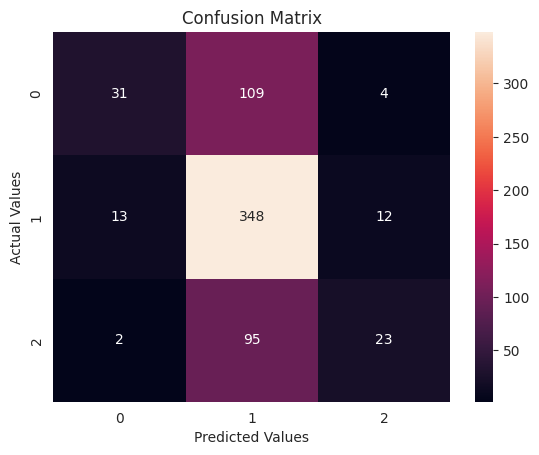

In [277]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Let's break it down:
31+109+4+13+348+12+2+95+23 = 637 total samples
* 0~
  * TP = 31
  * FN = (109 + 4) =113
  * FP = (13+2) = 15
  * TN = 637-(31+113+12) = 478
* 1~
  * TP = 348
  * FN = 25
  * FP = 204
  * TN = 60
* 2~
  * TP = 23
  * FN = 97
  * FP = 16
  * TN = 501


From the confusion matrix we can see how class 1 appears to be the majority and class 0 and 2 are less frequent.

To dive in a little more, let's look at the f1 score. This model is intended to measure the true positive predictions from the model and the actual samples(*Kundu, 2022*).

In [278]:
from sklearn.metrics import f1_score
y_pred_int = np.round(y_pred).astype(int)
print("IT:",f1_score(y_test, y_pred_int, average="macro"))

IT: 0.4560187993355818




---



## LogisticAT

This is another ordinal regression model from the mord library.

In [235]:
from mord import LogisticAT
from sklearn.metrics import accuracy_score
# LogisticAt: "Thinks about Distance. It wants to be "close" to the right answer." (Gemini)

# one-hot encoding quantitative variables
quant_df = pd.get_dummies(new_df, columns=['eqwlth', 'postlife', 'hapmar',
       'hapcohab', 'life', 'helpful', 'fair', 'trust', 'satjob', 'satfin',
       'goodlife', 'cantrust', 'dwelown16', 'RISKLIFE', 'TAKELIFE'], drop_first=True, dtype=int)

X = quant_df.drop(columns=['id', 'year', 'happy'])
y = new_df['happy'].astype(int)-1 #starting 0,1,2 for mord

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 45)

LA = LogisticAT()
LA.fit(X_train, y_train)

y_pred = LA.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}") #using .score would result in negative because of Sklearn rules

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")

# Showing the data
LR_Results = pd.DataFrame({'variable': X.columns, 'coefficient': LA.coef_}).sort_values(by='coefficient', ascending=False).head()
LR_Results

Accuracy: 0.6232339089481946
Mean Absolute Error: 0.38


,variable,coefficient
13,life_Exciting,0.912242
23,satjob_Very satisfied,0.687409
25,satfin_Pretty well satisfied,0.553417
21,satjob_Moderately satisfied,0.494606
28,goodlife_Strongly agree,0.467670


In [236]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 25, 117,   2],
       [ 12, 354,   7],
       [  2, 100,  18]])

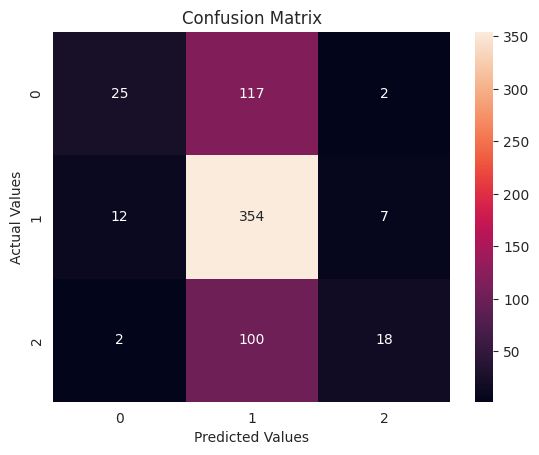

In [237]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [238]:
from sklearn.metrics import f1_score
y_pred_i = np.round(y_pred).astype(int)
print("AT:",f1_score(y_test, y_pred_i, average="macro"))

AT: 0.4227073342998402




---



## LogisticSE

This is another ordinal regression model from the mord library. Compared to LogisticAT (absolute errror), this is squared error.

This time we will also calculate the *mean squared error* (MSE) as a measure of fit to match the SE:

$$
\begin{aligned}
    \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2\;.
\end{aligned}
$$


In [239]:
def mse(y, y_pred):
    return ((y_pred - y) ** 2).mean()

In [240]:
from mord import LogisticSE
from sklearn.metrics import accuracy_score

# one-hot encoding quantitative variables
quant_df = pd.get_dummies(new_df, columns=['eqwlth', 'postlife', 'hapmar',
       'hapcohab', 'life', 'helpful', 'fair', 'trust', 'satjob', 'satfin',
       'goodlife', 'cantrust', 'dwelown16', 'RISKLIFE', 'TAKELIFE'], drop_first=True, dtype=int)

X = X = quant_df.drop(columns=['id', 'year', 'happy'])
y = new_df['happy'].astype(int)-1 #starting 0,1,2 for mord

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 45)

LSE = LogisticSE()
LSE.fit(X_train, y_train)

y_pred = LSE.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")

print(f"Mean Squared Error: {mse(y_test, y_pred):.2f}")

SE = pd.DataFrame({'variable': X.columns, 'coefficient': LSE.coef_}).sort_values(by='coefficient', ascending=False).head()
SE

Accuracy: 0.6106750392464678
Mean Squared Error: 0.40


,variable,coefficient
13,life_Exciting,1.540642
23,satjob_Very satisfied,0.919405
14,life_Routine,0.759042
21,satjob_Moderately satisfied,0.701073
25,satfin_Pretty well satisfied,0.578724


In [241]:
confusion_matrix(y_test, y_pred, normalize="true")

array([[0.14583333, 0.84722222, 0.00694444],
       [0.02949062, 0.96246649, 0.0080429 ],
       [0.01666667, 0.90833333, 0.075     ]])

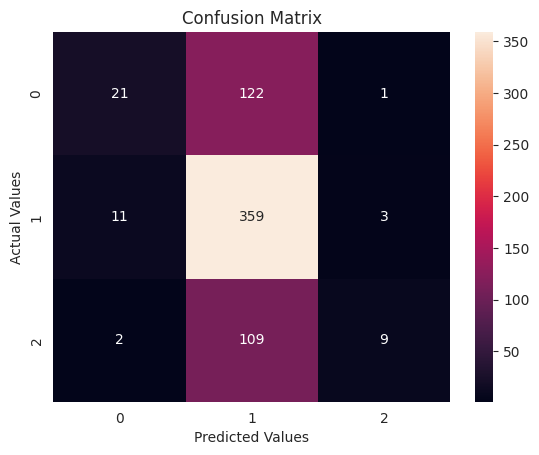

In [242]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [243]:
from sklearn.metrics import f1_score
y_pred_it = np.round(y_pred).astype(int)
print("SE:",f1_score(y_test, y_pred_it, average="macro"))

SE: 0.3722933700826559




---



## Ordinal Ridge

The ordinal ridge regression is part of the mord function. It is intended to handle data where "target variable has ordered categories but the distance between categories is not necessarily uniform"(Google)

In [244]:
from mord import OrdinalRidge

# one-hot encoding quantitative variables
quant_df = pd.get_dummies(new_df, columns=['eqwlth', 'postlife', 'hapmar',
       'hapcohab', 'life', 'helpful', 'fair', 'trust', 'satjob', 'satfin',
       'goodlife', 'cantrust', 'dwelown16', 'RISKLIFE', 'TAKELIFE'], drop_first=True, dtype=int)

X = quant_df.drop(columns=['id', 'year', 'happy'])
y = new_df['happy'].astype(int)-1 #starting 0,1,2 for mord

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 45)

OR = OrdinalRidge()
OR.fit(X_train, y_train)

y_pred = OR.predict(X_test.values)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")

OR = pd.DataFrame({'variable': X.columns, 'coefficient': OR.coef_}).sort_values(by='coefficient', ascending=False).head()
OR

Accuracy: 0.6185243328100472
Mean Absolute Error: 0.38


,variable,coefficient
13,life_Exciting,0.551880
14,life_Routine,0.339902
23,satjob_Very satisfied,0.234614
10,hapmar_VERY HAPPY,0.200222
34,dwelown16_Paid rent,0.179407


In [245]:
confusion_matrix(y_test, y_pred, normalize="true")

array([[0.16666667, 0.82638889, 0.00694444],
       [0.02949062, 0.96514745, 0.00536193],
       [0.00833333, 0.90833333, 0.08333333]])

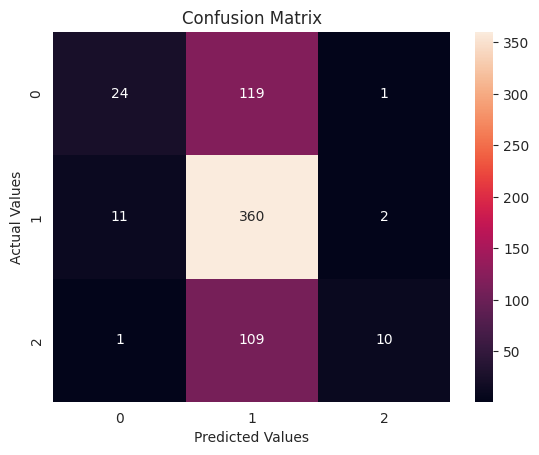

In [246]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [247]:
from sklearn.metrics import f1_score
y_pred_nt = np.round(y_pred).astype(int)
print("OR:",f1_score(y_test, y_pred_nt, average="macro"))

OR: 0.3887540564905152




---



## Multinomial

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# one-hot encoding quantitative variables
quant_df = pd.get_dummies(new_df, columns=['eqwlth', 'postlife', 'hapmar',
       'hapcohab', 'life', 'helpful', 'fair', 'trust', 'satjob', 'satfin',
       'goodlife', 'cantrust', 'dwelown16', 'RISKLIFE', 'TAKELIFE'], drop_first=True, dtype=int)

X = quant_df.drop(columns=['id', 'year', 'happy'])
y = new_df['happy'].astype(int)-1 #starting 0,1,2 for mord

#have a consistent random state for debugging and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 45)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Mult = LogisticRegression(solver='lbfgs', max_iter=1000)
Mult.fit(X_train, y_train)

y_pred = Mult.predict(X_test)
print(f"Accuracy: {Mult.score(X_test,y_test)}")

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")

class_index = list(Mult.classes_).index(2)
Mult.results=(
    pd.DataFrame({'variable': X.columns,
    'coefficient': Mult.coef_[class_index]
})
    .sort_values(by='coefficient', ascending=False)
)
Mult.results.head()

Accuracy: 0.6326530612244898
Mean Absolute Error: 0.38


,variable,coefficient
13,life_Exciting,0.496162
23,satjob_Very satisfied,0.366950
12,hapcohab_3.0,0.281241
21,satjob_Moderately satisfied,0.244396
14,life_Routine,0.235669


In [268]:
confusion_matrix(y_test, y_pred, normalize="true")

array([[0.31944444, 0.64583333, 0.03472222],
       [0.0536193 , 0.8766756 , 0.06970509],
       [0.04166667, 0.70833333, 0.25      ]])

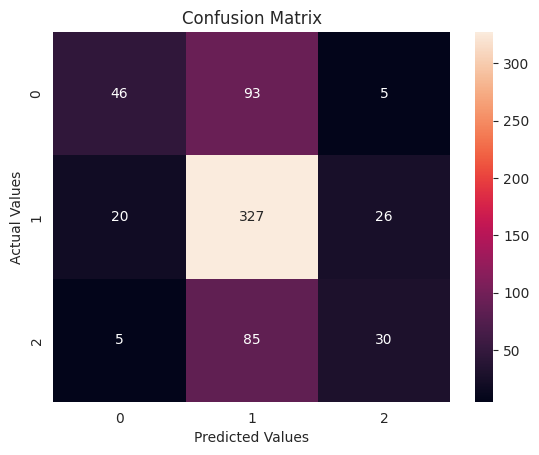

In [269]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [270]:
from sklearn.metrics import f1_score
y_pred_iint = np.round(y_pred).astype(int)
print("MT:",f1_score(y_test, y_pred_iint, average="macro"))

MT: 0.5014244682377759




---



## Linear Regression

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

# one-hot encoding quantitative variables
quant_df = pd.get_dummies(new_df, columns=['eqwlth', 'postlife', 'hapmar',
       'hapcohab', 'life', 'helpful', 'fair', 'trust', 'satjob', 'satfin',
       'goodlife', 'cantrust', 'dwelown16', 'RISKLIFE', 'TAKELIFE'], drop_first=True, dtype=int)

# Getting X and y
X = quant_df.drop(columns=['id', 'year', 'happy'])
y = new_df['happy']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 45)

# Fitting a linear regression model to the data
LR = LinearRegression()
LR.fit(X_train, y_train)

# Showing the data
LR_Results = pd.DataFrame({'variable': X.columns, 'coefficient': LR.coef_}).sort_values(by='coefficient', ascending=False)

# Determining Accuracy
y_pred = LR.predict(X_test)
LR.score(X_test, y_test)

print(f"Accuracy: {LI.score(X_test,y_test)}")

Accuracy: 0.18995290423861852


In [253]:
from sklearn.metrics import f1_score
y_pred_iint = np.round(y_pred).astype(int)
print("LR:",f1_score(y_test, y_pred_iint, average="macro"))

LR: 0.3948153654631703


## Visualizations

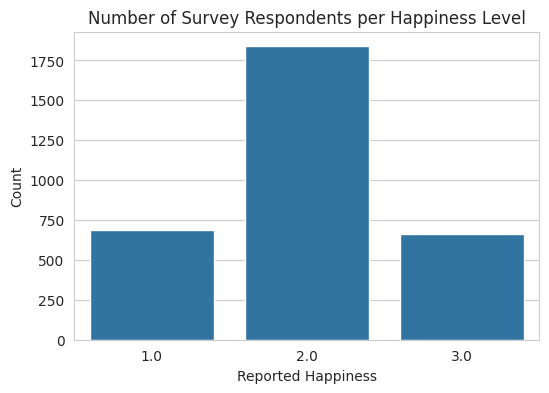

In [254]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(new_df, x=new_df['happy'], ax=ax)
ax.set_xlabel("Reported Happiness")
ax.set_ylabel("Count")
ax.set_title("Number of Survey Respondents per Happiness Level")
plt.show()

## *Financial Satisfaction Based on Happiness*

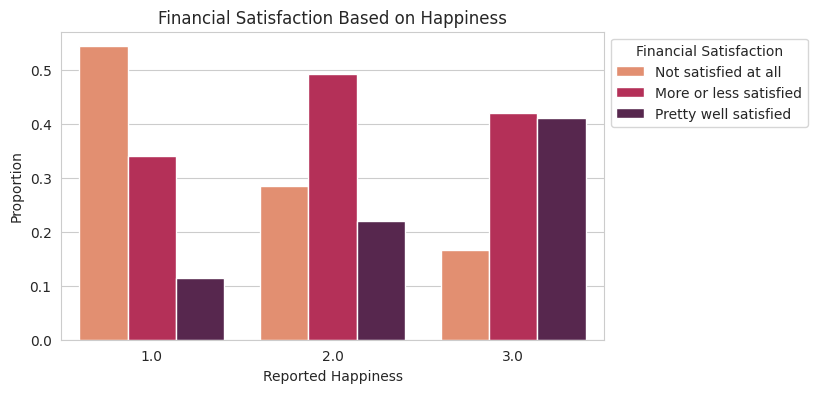

In [255]:
happy_life_counts = new_df.groupby(['happy', 'satfin']).size()
total_happy_counts = new_df.groupby('happy').size()
prop_series = happy_life_counts.div(total_happy_counts, level='happy')

prop_df = prop_series.reset_index(name='proportion')

fig, ax = plt.subplots(figsize=(7, 4))

sns.barplot(
    data=prop_df,
    x='happy',
    y='proportion',
    hue='satfin',
    hue_order=['Not satisfied at all', 'More or less satisfied', 'Pretty well satisfied'],
    palette='rocket_r',
    ax=ax
)

ax.set_ylabel("Proportion")
ax.set_xlabel("Reported Happiness")
ax.set_title("Financial Satisfaction Based on Happiness")
plt.legend(title="Financial Satisfaction", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

ax.set_ylabel("Proportion")
plt.show()

*Figure 2. The proportion of people at each happiness level who are not dissatisfied, mildly satisfied, or very satisfied with their finances. Financial satisfaction increases as happiness increases, and dissatisfaction decreases as happiness increases.*



---



## *Life Satisfaction Based on Happiness*

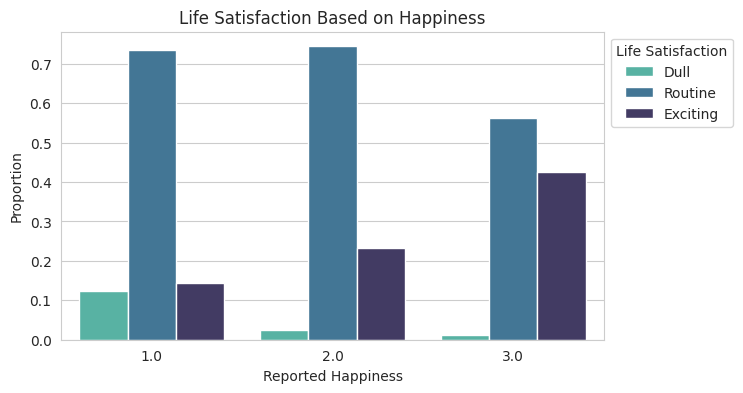

In [256]:
# Calculate the count for each 'happy' and 'life' combination
happy_life_counts = new_df.groupby(['happy', 'life']).size()

# Calculate the total count for each 'happy' category
total_happy_counts = new_df.groupby('happy').size()

# Calculate proportions by dividing happy_life_counts by total_happy_counts, aligning on 'happy'
# `div(level='happy')` is suitable for Series with MultiIndex for alignment
prop_series = happy_life_counts.div(total_happy_counts, level='happy')

# Convert the resulting Series to a DataFrame and rename the proportion column
prop_df = prop_series.reset_index(name='proportion')

fig, ax = plt.subplots(figsize=(7, 4))

sns.barplot(
    data=prop_df,
    x='happy',
    y='proportion', # Use the named column for proportions
    hue='life',
    hue_order=['Dull', 'Routine', 'Exciting'],
    palette='mako_r',
    ax=ax
)

ax.set_ylabel("Proportion")
ax.set_xlabel("Reported Happiness")
ax.set_title("Life Satisfaction Based on Happiness")
plt.legend(title="Life Satisfaction", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Figure 3.  The proportion of people at each happiness level who find life to be dull, routine, or exciting. The proportion of people who find life dull decreases as happiness increases. The proportion of people who find life exciting increases as happiness increases.



---



## *Job Satisfaction Based on Happiness*

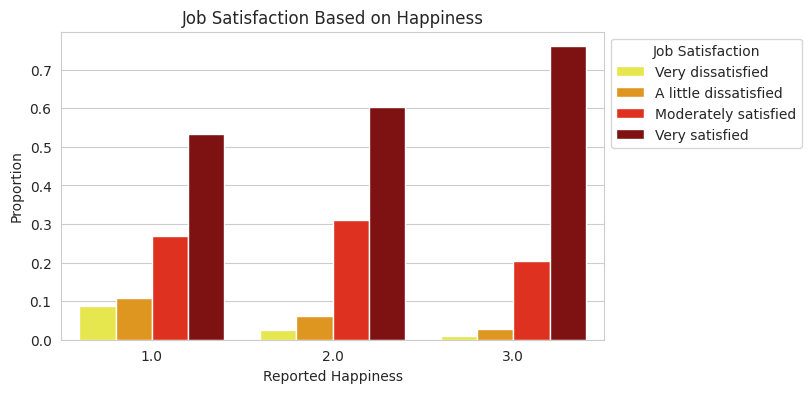

In [257]:
happy_life_counts = new_df.groupby(['happy', 'satjob']).size()
total_happy_counts = new_df.groupby('happy').size()
prop_series = happy_life_counts.div(total_happy_counts, level='happy')

prop_df = prop_series.reset_index(name='proportion')

fig, ax = plt.subplots(figsize=(7, 4))

sns.barplot(
    data=prop_df,
    x='happy',
    y='proportion', # Use the named column for proportions
    hue='satjob',
    hue_order=['Very dissatisfied', 'A little dissatisfied', 'Moderately satisfied', 'Very satisfied'],
    palette = 'hot_r',
    ax=ax
)

ax.set_ylabel("Proportion")
ax.set_xlabel("Reported Happiness")
ax.set_title("Job Satisfaction Based on Happiness")
plt.legend(title="Job Satisfaction", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Figure 4. The proportion of people at each happiness level who are very dissatisfied, a little dissatisfied, moderately satisfied, or very satisfied with their jobs. The job satisfaction increases as happiness increases, and dissatisfaction decreases as happiness increases.

## Results

The model shows that age, homeownership, politics, and even income are not correlated with happiness. Rather, people who view life as exciting rather than dull, are content with their finances regardless of income, and are satisfied with their jobs are the most likely to be happy people.

We have found that, for happiness, perspective is more important than circumstance. The implications of our finding is that all people have the ability to find happiness, which we hope can empower and inspire others.



---



# References

* *F1 Score in Machine Learning: Intro & Calculation*. Rohit Kundu. December 16, 2022. V7Labs. (https://www.v7labs.com/blog/f1-score-guide)
* Google(2025). (https://gemini.google.com/)

* *GSS Data Explorer*. Norc at the University of Chicago, (https://gssdataexplorer.norc.org/variables/vfilter)

* *Inputting Missing Values*. Scikit. (https://scikit-learn.org/stable/modules/impute.html)

* Schapiro, Benjamin. *“Quick Guide to Variables in the 2024 GSS Cross-Section (Release 1).”* GSS 2024 Release Variables, 22 May 2025. GSS Data Explorer, (https://sda.berkeley.edu/sdaweb/docs/gss24rel1/DOC/GSS2024ReleaseVariables.pdf)

* *World Happiness Report* (2015-2025)
(https://www.worldhappiness.report/analysis/)

* *Understanding the Confusion Matrix in Machine Learning*. Geeksforgeeks.
 (https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/)



---

